In [1]:
%reload_ext autoreload
%autoreload 2

import os
if os.path.basename(os.getcwd()) == 'explorations':
    os.chdir('..')

import itertools
import numpy as np
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
from matplotlib import cm

from src.sampling.clustering import get_n_clustered

# visualizations

In [9]:
cmap = cm.Set1

def vis_clustering_result(features, indices, cluster_indices, title=''):
    clusters = np.sort(np.unique(cluster_indices))

    for i in clusters:
        plt.scatter(features[cluster_indices == i,0], features[cluster_indices == i,1], color=cmap(i))

    for i in indices:
        plt.scatter(features[i,0], features[i,1], color='white', s=15, marker='+')

    plt.title(title)
    plt.axis('off')
    plt.show()

# gaussians

In [10]:
# Define the means and covariance matrices of the 2D Gaussian distributions
means = [[1, 2], [3, 4], [5, 6]]   # mean of each 2D Gaussian
covs = [np.eye(2)*0.1, np.eye(2)*0.2, np.eye(2)*0.3]   # covariance matrix of each 2D Gaussian

# Define the number of samples to generate from each 2D Gaussian
num_samples_per_gaussian = 100

# Generate the samples
features = []
for i in range(len(means)):
    # Generate samples from the i-th 2D Gaussian distribution
    samples_i = np.random.multivariate_normal(means[i], covs[i], num_samples_per_gaussian)
    features.append(samples_i)

# Concatenate the samples from all 2D Gaussian distributions into a single array
features = np.concatenate(features)

features.shape

(300, 2)

# various sampling methods

In [11]:
N_SAMPLES = 30
N_CLUSTERS = 3
CRITERIA = ['closest', 'furthest', 'random', 'half_in_half', 'fps']
CRITERIA_TITLE_MAPPING = {
    'closest': 'closest to centroid',
    'furthest': 'furthest from centroid',
    'random': 'random within cluster',
    'half_in_half': 'half closest/half furthest from centroid',
    'fps': 'furthest point sampling'
}

## kmeans++

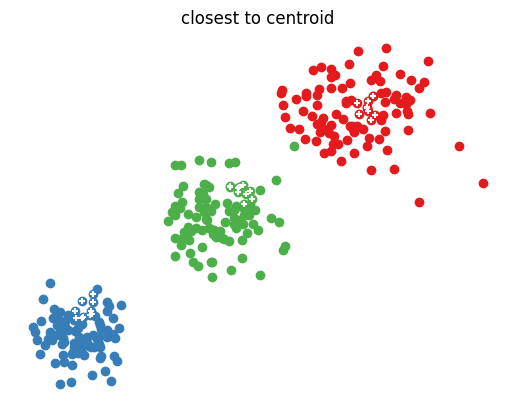

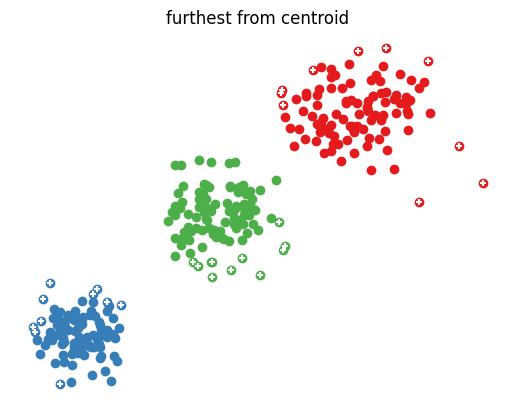

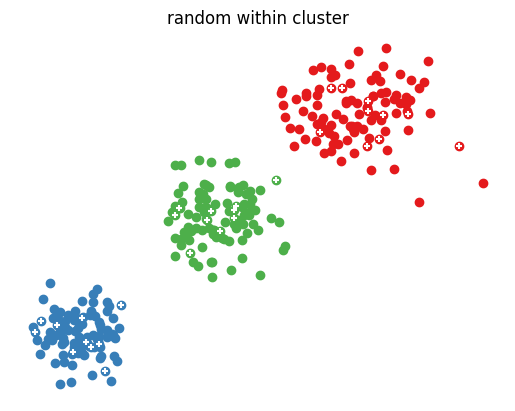

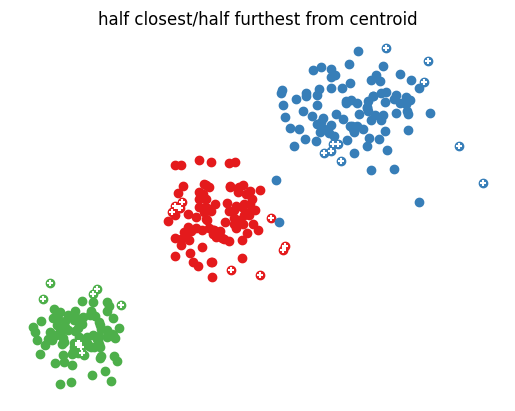

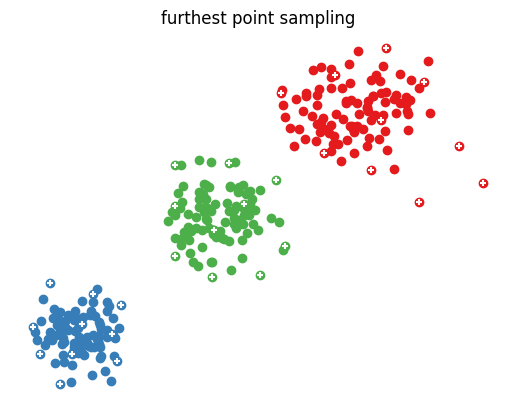

In [12]:
for criterium in CRITERIA:
    indices, cluster_indices = get_n_clustered(
        features=features, 
        n_samples=N_SAMPLES, n_clusters=N_CLUSTERS,
        mode='kmeans++', criterium=criterium,
        verbose=True
    )
    vis_clustering_result(features, indices, cluster_indices, CRITERIA_TITLE_MAPPING[criterium])


## kmeans

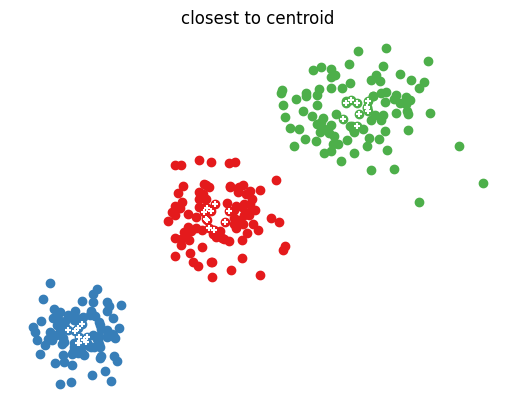

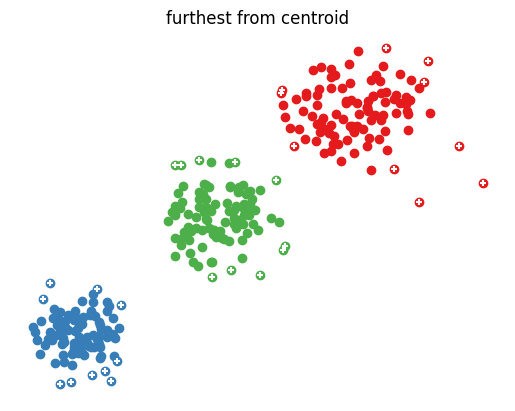

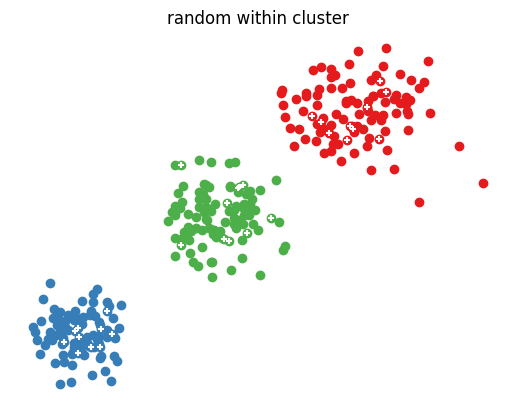

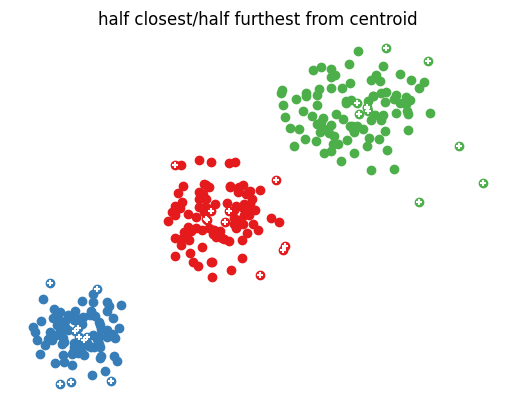

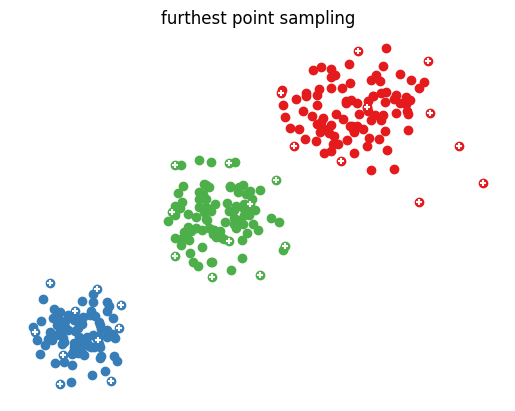

In [14]:
for criterium in CRITERIA:
    indices, cluster_indices = get_n_clustered(
        features=features, 
        n_samples=N_SAMPLES, n_clusters=N_CLUSTERS,
        mode='kmeans', criterium=criterium,
        verbose=True
    )
    vis_clustering_result(features, indices, cluster_indices, CRITERIA_TITLE_MAPPING[criterium])


# fps with one cluster

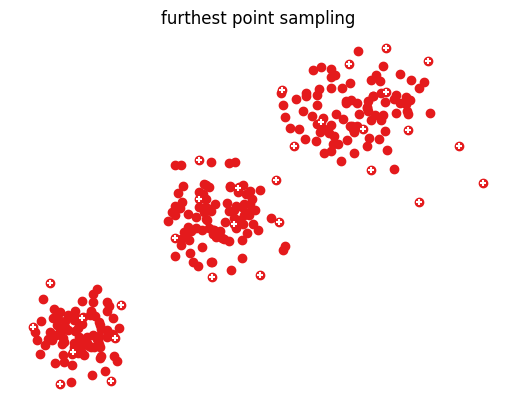

In [15]:
indices, cluster_indices = get_n_clustered(
    features=features, 
    n_samples=N_SAMPLES, n_clusters=1,
    mode='kmeans', criterium='fps',
    verbose=True
)
vis_clustering_result(features, indices, cluster_indices, CRITERIA_TITLE_MAPPING['fps'])

# fps with three samples and three clusters

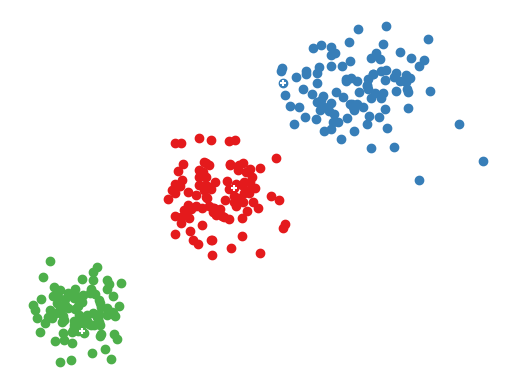

In [16]:
indices, cluster_indices = get_n_clustered(
    features=features, 
    n_samples=3, n_clusters=3,
    mode='kmeans', criterium='fps',
    verbose=True
)
vis_clustering_result(features, indices, cluster_indices)
